## Survival Rates

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import sem

# Hide warning messages in notebook

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv("data/mouse_drug_data.csv")
clinical_data = pd.read_csv("data/clinicaltrial_data.csv")

# Combine the data into a single dataset

clinical_data['Metastatic Sites']=pd.to_numeric(clinical_data['Metastatic Sites'])

combined_df=pd.merge(clinical_data, mouse_data, on='Mouse ID')
#combined_df.head()

combined_results_df = pd.DataFrame({'Drug' : combined_df['Drug'], 'Timepoint' : combined_df['Timepoint'], 
                                   'Tumor Volume' : combined_df['Tumor Volume (mm3)'],
                                    'Surviving Mice': combined_df['Mouse ID']})
#Display the data table for preview
combined_results_df.head()

,Drug,Timepoint,Tumor Volume,Surviving Mice
0,Capomulin,0,45.000000,b128
1,Capomulin,5,45.651331,b128
2,Capomulin,10,43.270852,b128
3,Capomulin,15,43.784893,b128
4,Capomulin,20,42.731552,b128


## Tumor Response Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_response = combined_results_df.loc[:,["Timepoint", "Drug", "Tumor Volume"]]
tumor_mean = tumor_response.groupby(["Drug", "Timepoint"]).mean()

# Convert to DataFrame
tumor_df=pd.DataFrame(tumor_mean.reset_index())
tumor_df.columns=['Drug', 'Timepoint', 'Avg Tumor Volume']

# Preview DataFrame
tumor_df.head()

,Drug,Timepoint,Avg Tumor Volume
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sem=tumor_response.groupby(["Drug", "Timepoint"]).sem()
tumor_sem.head()

# Convert to DataFrame
sem_tumor_df=pd.DataFrame(tumor_sem.reset_index())
sem_tumor_df.columns=['Drug','Timepoint','Sem Tumor Volume']

# Preview DataFrame
sem_tumor_df.head()

,Drug,Timepoint,Sem Tumor Volume
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames - Average Tumor Volume
drug_tumor_avg_df=tumor_df.pivot(index='Timepoint', columns = 'Drug', values = 'Avg Tumor Volume')
drug_tumor_avg_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
# Minor Data Munging to Re-Format the Data Frames - Standard Error Tumor Volume
drug_tumor_sem_df=sem_tumor_df.pivot(index='Timepoint', columns = 'Drug', values = 'Sem Tumor Volume')
drug_tumor_sem_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


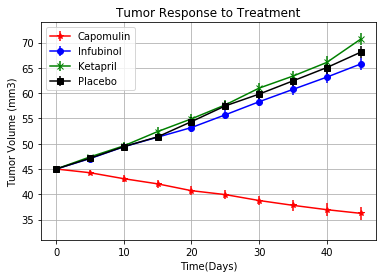

<Figure size 432x288 with 0 Axes>

In [6]:
# Generate the Plot (with Error Bars)
plt.ylim(31,74,5)
plt.title("Tumor Response to Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)

plt.errorbar(np.arange(0, 50, 5), tumor_mean.loc["Capomulin", "Tumor Volume"],
             yerr = tumor_sem.loc["Capomulin", "Tumor Volume"], marker = "*", color = "red", label = "Capomulin")
plt.errorbar(np.arange(0, 50, 5), tumor_mean.loc["Infubinol", "Tumor Volume"],
             yerr = tumor_sem.loc["Capomulin", "Tumor Volume"], marker = "o", color = "blue", label = "Infubinol")
plt.errorbar(np.arange(0, 50, 5), tumor_mean.loc["Ketapril", "Tumor Volume"],
             yerr = tumor_sem.loc["Capomulin", "Tumor Volume"], marker = "x", color = "green", label = "Ketapril")
plt.errorbar(np.arange(0, 50, 5), tumor_mean.loc["Placebo", "Tumor Volume"],
             yerr = tumor_sem.loc["Capomulin", "Tumor Volume"], marker = "s", color = "black", label = "Placebo")
plt.legend(loc="upper left")

# Show the Figure
plt.show()

# Save the Figure
plt.savefig('Tumor Response.png') 

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_response= combined_df.loc[:,["Drug", "Timepoint", "Metastatic Sites"]]
meta_mean = meta_response.groupby(['Drug', 'Timepoint']).mean()

# Convert to DataFrame
meta_df=pd.DataFrame(meta_mean.reset_index())
meta_df.columns=['Drug', 'Timepoint', 'Metastatic Sites']

# Preview DataFrame
meta_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_sem = meta_response.groupby(['Drug', 'Timepoint']).sem()

# Convert to DataFrame
sem_meta_df=pd.DataFrame(meta_sem.reset_index())
sem_meta_df.columns=["Drug", "Timepoint", "Metastatic Sites"]

# Preview DataFrame
sem_meta_df.head(5)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
# Minor Data Munging to Re-Format the Data Frames
meta_avg_df=meta_df.pivot(index='Timepoint', columns = 'Drug', values = 'Metastatic Sites')
meta_avg_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [10]:
# Minor Data Munging to Re-Format the Data Frames
meta_sem_df=sem_meta_df.pivot(index='Timepoint', columns = 'Drug', values = 'Metastatic Sites')

# Preview that Reformatting worked
meta_sem_df.head(5)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


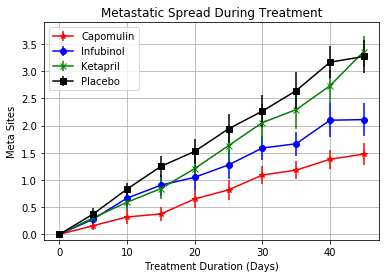

<Figure size 432x288 with 0 Axes>

In [19]:
# Generate the Plot (with Error Bars)
plt.ylim(-0.1,3.9,0.5)
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Meta Sites")
plt.grid(True)

plt.errorbar(np.arange(0, 50, 5), meta_mean.loc["Capomulin", "Metastatic Sites"],
             yerr = meta_sem.loc["Capomulin", "Metastatic Sites"], marker = "*", color = "red", label = "Capomulin")
plt.errorbar(np.arange(0, 50, 5), meta_mean.loc["Infubinol", "Metastatic Sites"],
             yerr = meta_sem.loc["Infubinol", "Metastatic Sites"], marker = "o", color = "blue", label = "Infubinol")
plt.errorbar(np.arange(0, 50, 5), meta_mean.loc["Ketapril", "Metastatic Sites"],
             yerr = meta_sem.loc["Ketapril", "Metastatic Sites"], marker = "x", color = "green", label = "Ketapril")
plt.errorbar(np.arange(0, 50, 5), meta_mean.loc["Placebo", "Metastatic Sites"],
             yerr = meta_sem.loc["Placebo", "Metastatic Sites"], marker = "s", color = "black", label = "Placebo")
plt.legend(loc="upper left")

# Show the Figure
plt.show()

# Save the Figure
plt.savefig('Meta Response.png') 

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice= combined_results_df.loc[:,["Drug", "Timepoint", "Surviving Mice"]]
mice_count = mice.groupby(['Drug', 'Timepoint']).count()


# Convert to DataFrame
mice_count_df=pd.DataFrame(mice_count.reset_index())
mice_count_df.columns=['Drug', 'Timepoint', 'Surviving Mice']

# Preview DataFrame
mice_count_df.head()

,Drug,Timepoint,Surviving Mice
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_df=mice_count_df.pivot(index='Timepoint', columns = 'Drug', values = 'Surviving Mice')


# Preview the Data Frame
mice_count_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [14]:
mice= combined_results_df.loc[:,["Drug", "Timepoint", "Surviving Mice"]]
mice_survival = mice.groupby(['Drug', 'Timepoint']).count()/25 * 100

mice_survival_df=pd.DataFrame(mice_survival.reset_index())
mice_survival_df.columns=['Drug', 'Timepoint', 'Surviving Mice']
mice_survival_rate_df=pd.DataFrame({"Drug":mice_survival_df['Drug'], "Timepoint":mice_survival_df['Timepoint'], "Survival%":mice_survival_df['Surviving Mice']})

#mice_survival_df=mice_survival_df.pivot(index='Timepoint', columns = 'Drug', values = 'Surviving Mice')
mice_survival_rate_df=mice_survival_rate_df.pivot(index='Timepoint', columns = 'Drug', values = 'Survival%')

mice_survival_rate_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,104.0,100.0,104.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,100.0,100.0,100.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,92.0,96.0,92.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,68.0,96.0,92.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,68.0,92.0,84.0,68.0


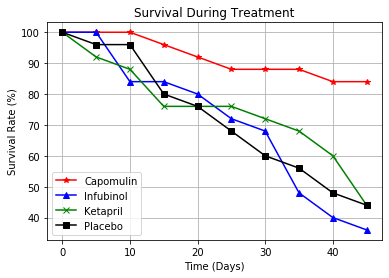

In [15]:
# Generate the Plot (Accounting for percentages)
plt.plot(mice_survival_rate_df["Capomulin"],marker = "*", color = "red", label = "Capomulin")
plt.plot(mice_survival_rate_df["Infubinol"],marker = "^", color = "blue", label = "Infubinol")
plt.plot(mice_survival_rate_df["Ketapril"], marker = "x", color = "green", label = "Ketapril")
plt.plot(mice_survival_rate_df["Placebo"], marker = "s", color = "black", label = "Placebo")
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(loc="lower left")

# Save the Figure
plt.savefig('Survival.png') 

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [16]:
# Calculate the percent changes for each drug
tumor_percent_change =  100 * (drug_tumor_avg_df.iloc[-1] - drug_tumor_avg_df.iloc[0]) / drug_tumor_avg_df.iloc[0]
tumor_percent_change_sem =  100 * (drug_tumor_sem_df.iloc[-1] - drug_tumor_sem_df.iloc[0]) / drug_tumor_sem_df.iloc[0]

# Display the data to confirm
tumor_percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

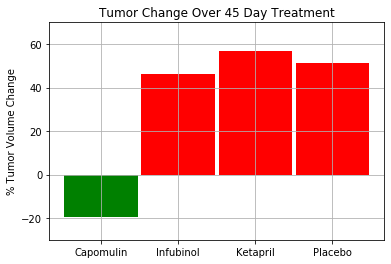

In [18]:
# Store all Relevant Percent Changes into a Tuple
percent_changes = (tumor_percent_change["Capomulin"], 
               tumor_percent_change["Infubinol"], 
               tumor_percent_change["Ketapril"], 
               tumor_percent_change ["Placebo"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
index = np.arange(len(percent_changes))  
width = 0.95
rectsPass = ax.bar(index[0], percent_changes[0], width, color='green')
rectsFail = ax.bar(index[1:], percent_changes[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(index + 0.0)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)


# Save the Figure
plt.savefig('PercentChange.png') 


# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)